# Value Function for Recycling Robot

Converged in 120 iterations.
Optimal value at high: 25.4237
Optimal value at low : 22.8813


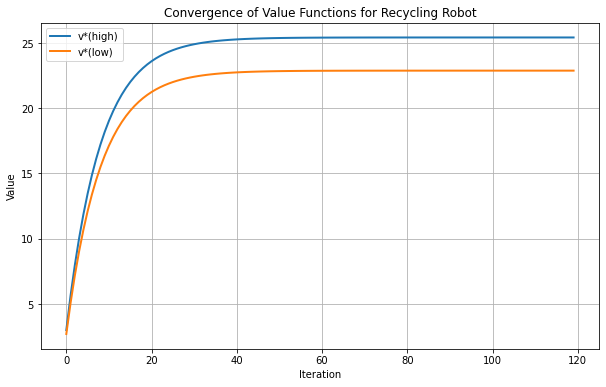

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.8    # P(high | high, search)
beta = 0.6     # P(low | low, search)
r_search = 3   # Reward for search
r_wait = 1     # Reward for wait
gamma = 0.9    # Discount factor

# Initialize value estimates
v_high = 0.0
v_low = 0.0

# Lists to store the evolution of values
v_high_list = []
v_low_list = []

def solve_values(tol=1e-6, max_iter=1000):
    global v_high, v_low
    for it in range(max_iter):
        v_high_old, v_low_old = v_high, v_low

        # Bellman backup for high
        search_high = r_search + gamma * (alpha * v_high + (1 - alpha) * v_low)
        wait_high = r_wait + gamma * v_high
        v_high = max(search_high, wait_high)

        # Bellman backup for low
        search_low = beta * r_search - 3 * (1 - beta) + gamma * ((1 - beta) * v_high + beta * v_low)
        wait_low = r_wait + gamma * v_low
        recharge = gamma * v_high
        v_low = max(search_low, wait_low, recharge)

        # Save values for plotting
        v_high_list.append(v_high)
        v_low_list.append(v_low)

        # Check for convergence
        if max(abs(v_high - v_high_old), abs(v_low - v_low_old)) < tol:
            print(f"Converged in {it+1} iterations.")
            break

    return v_high, v_low

v_high_star, v_low_star = solve_values()

# Print final values
print(f"Optimal value at high: {v_high_star:.4f}")
print(f"Optimal value at low : {v_low_star:.4f}")

# Plotting
plt.figure(figsize=(10,6))
plt.plot(v_high_list, label="v*(high)", linewidth=2)
plt.plot(v_low_list, label="v*(low)", linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of Value Functions for Recycling Robot')
plt.grid(True)
plt.legend()
plt.show()